In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2023/train_data.csv
/kaggle/input/widsdatathon2023/test_data.csv
/kaggle/input/widsdatathon2023/sample_solution.csv


## Data loading

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train_url = '/kaggle/input/widsdatathon2023/train_data.csv'
test_url = '/kaggle/input/widsdatathon2023/test_data.csv'

In [4]:
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

## Exploratory Data Analysis

In [5]:
train_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Columns: 246 entries, index to wind-vwnd-925-2010-20
dtypes: float64(240), int64(4), object(2)
memory usage: 705.2+ MB


In [7]:
print(train_df.columns)
print(train_df.isnull().sum())

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=246)
index                                           0
lat                                             0
lon                                             0
startdate                                       0
contest-pevpr-sfc-gauss-14d__pevpr              0
nmme0-tmp2m-34w__cancm30                        0
nmme0-tmp2m-34w__cancm40                        0
nmme0-tmp2m-34w__ccsm30                     15934
nmme0-tmp2m-34w__ccsm40       

In [8]:
column_types = train_df.dtypes
object_columns = column_types[column_types == 'object'].index
print(object_columns)

Index(['startdate', 'climateregions__climateregion'], dtype='object')


In [9]:
train_df['climateregions__climateregion'].value_counts()

BSk    139621
Dfb     52632
Cfa     51901
Csb     40936
Dfa     22661
BWk     13889
Dfc     12427
BWh      9503
Csa      9503
Dsb      8041
BSh      5117
Cfb      4386
Dsc      2924
Dwa      1462
Dwb       731
Name: climateregions__climateregion, dtype: int64

In [10]:
#Take a look a the target column
train_df['contest-tmp2m-14d__tmp2m'].head()

0    28.744480
1    28.370585
2    28.133059
3    28.256798
4    28.372353
Name: contest-tmp2m-14d__tmp2m, dtype: float64

Our task is to build a regression model to predict column '**contest-tmp2m-14d__tmp2m**', the average temperature.  Let's take a closer look at the data to understand what we are dealing with.
All but 2 of the columns are numerical. The 'startdate' and the 'climateregions__climateregion'.

In [11]:
train_df.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-925-20

In [12]:
# Create a new variable called 'location' by using 'lon' & 'lat'
import math
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

train_df['trunc_lon'] = train_df['lon'].apply(lambda x: truncate(x,4))
train_df['trunc_lon'] = train_df['trunc_lon'].map('{:.9f}'.format)

train_df['trunc_lat'] = train_df['lat'].apply(lambda x: truncate(x,4))
train_df['trunc_lat'] = train_df['trunc_lat'].map('{:.9f}'.format)

In [13]:
cols = ['trunc_lon', 'trunc_lat']
train_df['location'] = train_df[cols].apply(lambda row: '_'.join(row.values.astype(object)), axis=1)

In [14]:
train_df['location'].describe()

count                      375734
unique                        514
top       0.833300000_0.000000000
freq                          731
Name: location, dtype: object

The dataset belongs to 514 unique locations. 514 * 731 daily data instances. That is how it made for 375,734 rows 


In [15]:
test_df['trunc_lon'] = test_df['lon'].apply(lambda x: truncate(x,4))
test_df['trunc_lon'] = test_df['trunc_lon'].map('{:.9f}'.format)

test_df['trunc_lat'] = test_df['lat'].apply(lambda x: truncate(x,4))
test_df['trunc_lat'] = test_df['trunc_lat'].map('{:.9f}'.format)

In [16]:
test_df['location'] = test_df[cols].apply(lambda row: '_'.join(row.values.astype(object)), axis=1)

In [17]:
test_df['location'].describe()

count                       31354
unique                        514
top       0.833300000_0.000000000
freq                           61
Name: location, dtype: object

In [18]:
# Drop unnecessary columns from the train data frame  
train_df.drop(['lon','lat','trunc_lon','trunc_lat'], axis=1, inplace=True)
test_df.drop(['lon','lat','trunc_lon','trunc_lat'], axis=1, inplace=True)

## Data Cleaning

**Null values**

In [19]:
# Check for missing values
missing_values = train_df.isna().sum()

# Print the columns with missing values
print(missing_values[missing_values > 0])

nmme0-tmp2m-34w__ccsm30    15934
nmme-tmp2m-56w__ccsm3      10280
nmme-prate-34w__ccsm3       8738
nmme0-prate-56w__ccsm30    15934
nmme0-prate-34w__ccsm30    15934
nmme-prate-56w__ccsm3      10280
nmme-tmp2m-34w__ccsm3       8738
ccsm30                     15934
dtype: int64


In [20]:
null_pct = missing_values/train_df.shape[0]

In [21]:
print(null_pct[null_pct > 0.03])

nmme0-tmp2m-34w__ccsm30    0.042408
nmme0-prate-56w__ccsm30    0.042408
nmme0-prate-34w__ccsm30    0.042408
ccsm30                     0.042408
dtype: float64


In [22]:
train_df = train_df.sort_values(by=['startdate']).ffill()
test_df = test_df.sort_values(by=['startdate']).ffill()

**Set startdate as datetime and index**

In [23]:
#Convert to datetime
train_df['startdate'] = pd.to_datetime(train_df['startdate'])
test_df['startdate'] = pd.to_datetime(test_df['startdate'])

In [24]:
# Set the index to the date column
train_df.set_index('startdate', inplace=True)
test_df.set_index('startdate', inplace=True)

In [25]:
train_df.index

DatetimeIndex(['2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01',
               ...
               '2015-09-09', '2015-09-09', '2015-09-09', '2015-09-09',
               '2015-09-09', '2015-09-09', '2015-09-09', '2015-09-09',
               '2015-09-09', '2015-09-09'],
              dtype='datetime64[ns]', name='startdate', length=375734, freq=None)

**Visualize time series**

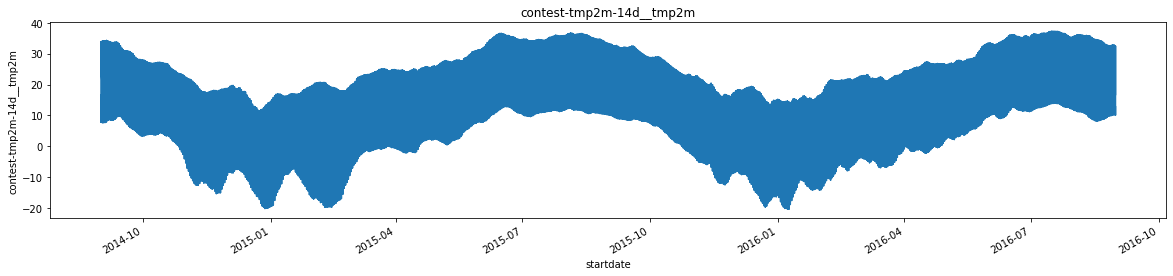

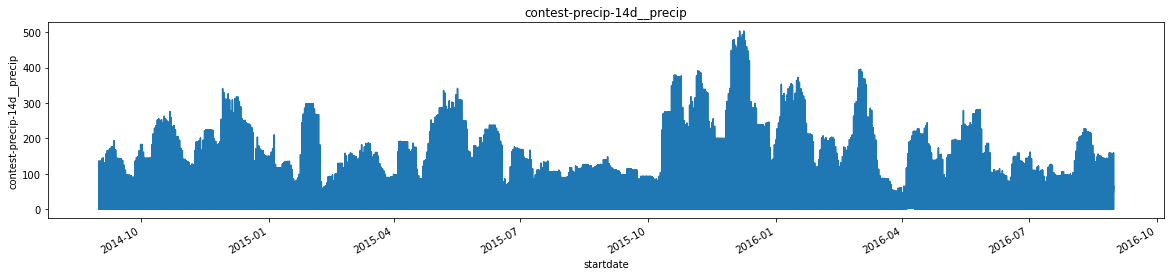

In [26]:
# Visualize time-series data Temperature and Precipitation
variables = list(train_df.columns)
for var in ['contest-tmp2m-14d__tmp2m', 'contest-precip-14d__precip']: 
    #plot the time series
    train_df[var].plot(figsize=(20,4))
    
    # add title
    plt.title(var)
    
    #the y axis lable
    plt.ylabel(var)
    
    plt.show()

In [27]:
# Capture "date" in a new variable
time_m = train_df.index.month
time_m =pd.Series(time_m, index=train_df.index)
time_y = train_df.index.year
time_y =pd.Series(time_y, index=train_df.index)

Text(0, 0.5, 'Temperature')

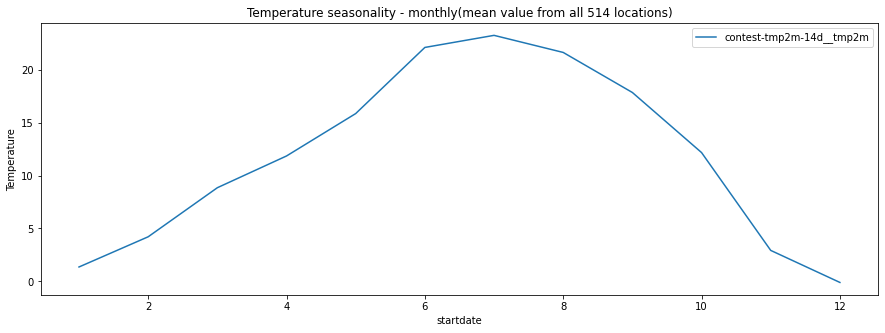

In [28]:
train_df.groupby(time_m)[['contest-tmp2m-14d__tmp2m']].mean().plot(figsize =(15,5))
plt.title("Temperature seasonality - monthly(mean value from all 514 locations)")
plt.ylabel("Temperature")

Text(0, 0.5, 'Temperature')

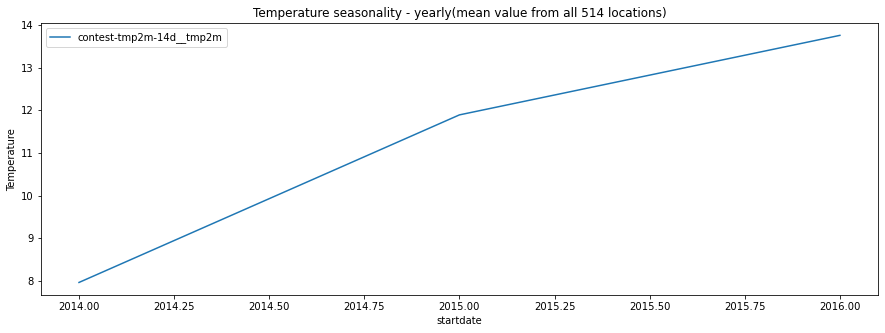

In [29]:
train_df.groupby(time_y)[['contest-tmp2m-14d__tmp2m']].mean().plot(figsize =(15,5))
plt.title("Temperature seasonality - yearly(mean value from all 514 locations)")
plt.ylabel("Temperature")

In [30]:
# Group the data by region
grouped = train_df.groupby('climateregions__climateregion')
test_grouped = test_df.groupby('climateregions__climateregion')

In [31]:
# Loop over the groups and print the value counts of each index
for name, group in grouped:
    print(f"{name}:")
    print(group.index.year.value_counts().sort_index(), end='\n\n')

BSh:
2014     854
2015    2555
2016    1708
Name: startdate, dtype: int64

BSk:
2014    23302
2015    69715
2016    46604
Name: startdate, dtype: int64

BWh:
2014    1586
2015    4745
2016    3172
Name: startdate, dtype: int64

BWk:
2014    2318
2015    6935
2016    4636
Name: startdate, dtype: int64

Cfa:
2014     8662
2015    25915
2016    17324
Name: startdate, dtype: int64

Cfb:
2014     732
2015    2190
2016    1464
Name: startdate, dtype: int64

Csa:
2014    1586
2015    4745
2016    3172
Name: startdate, dtype: int64

Csb:
2014     6832
2015    20440
2016    13664
Name: startdate, dtype: int64

Dfa:
2014     3782
2015    11315
2016     7564
Name: startdate, dtype: int64

Dfb:
2014     8784
2015    26280
2016    17568
Name: startdate, dtype: int64

Dfc:
2014    2074
2015    6205
2016    4148
Name: startdate, dtype: int64

Dsb:
2014    1342
2015    4015
2016    2684
Name: startdate, dtype: int64

Dsc:
2014     488
2015    1460
2016     976
Name: startdate, dtype: int64

Dwa:
2014 

**Encode region column**

In [32]:
#Fix climate_region column

from sklearn.preprocessing import LabelEncoder

# combine the training and test sets
combined_df = pd.concat([train_df, test_df], axis=0)

# create a LabelEncoder instance for each column
le1 = LabelEncoder()
le2 = LabelEncoder()

# fit the LabelEncoder instances on the combined data
le1.fit(combined_df['climateregions__climateregion'])
le2.fit(combined_df['location'])

# transform the training and test sets using the fitted LabelEncoder instances
train_df['climateregions__climateregion'] = le1.transform(train_df['climateregions__climateregion'])
train_df['location'] = le2.transform(train_df['location'])
test_df['climateregions__climateregion'] = le1.transform(test_df['climateregions__climateregion'])
test_df['location'] = le2.transform(test_df['location'])

## Feature Engineering

We are going to look at two key techniques for selecting important features for the model. The first is correlation and second is feature importance. 

### Correlation 

It is typically recommended to remove highly correlated variables when building out ML models. This is not only because there are specific model architectures that perform poorly under multicollinearity, but also because highly correlated variables have been shown to introduce higher risk of errrors. This is because having many correlated variables increases the complexity of your model without introducing a lot of additional, new information. 

In [33]:
print(len(train_df.columns))

244


In [34]:
print(len(test_df.columns))

243


One of the most common ways for people to check for correlation features is to visualize your feature space with a heatmap. However, with this many features we can see that a heatmap can be a bit overwhelming.

In [35]:
y = train_df['contest-tmp2m-14d__tmp2m']  # variable objetivo
X = train_df.drop('contest-tmp2m-14d__tmp2m', axis=1)  # variables predictoras

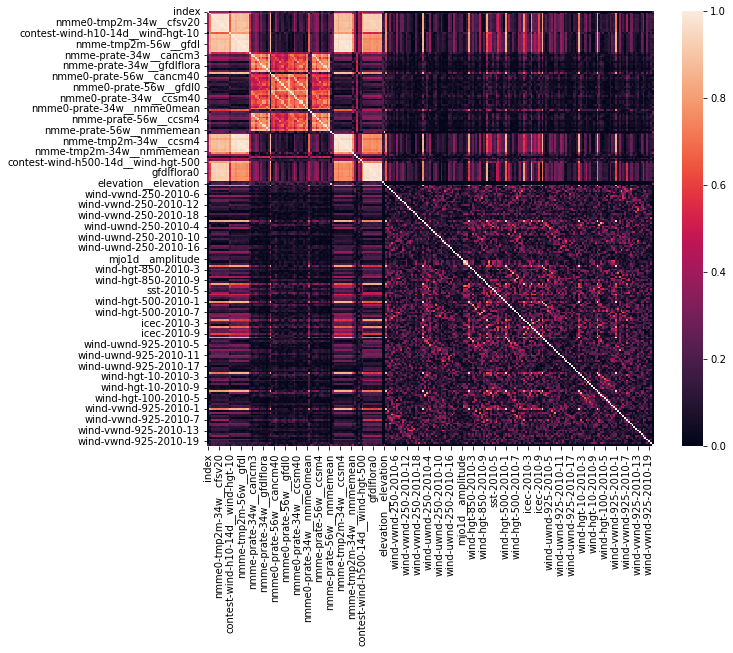

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns 
matrix = X.corr().abs()

plt.figure(figsize=(10,8))
_ = sns.heatmap(matrix)

In [37]:
## Identify correlated features to drop that fall above a correlation threshold 
## https://goodboychan.github.io/python/datacamp/machine_learning/2020/07/08/02-Feature-selection-I-selecting-for-feature-information.html 

def identify_correlated(df, threshold):
    corr_matrix = df.corr().abs()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    reduced_corr_matrix = corr_matrix.mask(mask)
    features_to_drop = [c for c in reduced_corr_matrix.columns if any(reduced_corr_matrix[c] > threshold)]
    return features_to_drop

In [38]:
print(len(X.columns))

243


In [39]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [40]:
## Get the column names to drop 
to_drop = identify_correlated(X, threshold=.95)

In [41]:
X_reduced = pd.DataFrame(X.drop(to_drop, axis=1))
test_reduced = pd.DataFrame(test_df.drop(to_drop, axis=1))

In [42]:
print(len(test_reduced.columns))

188


In [43]:
#Separate X into X_train and X_validation, and separate y into y_train and y_validation.

from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, shuffle=False)

In [45]:
#Using a pipeline to dynamically standardize the data that goes into our model

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso

from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

pipeline = make_pipeline(StandardScaler(), Lasso(alpha=2))
pipeline.fit(X_reduced_train, y_train)
print(pipeline[1].coef_, pipeline[1].intercept_)

[-0.          0.          0.          0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.          0.          0.
 -0.28374043  0.          0.         -0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.         -0.          5.6214762   0.          0.          0.
  0.         -0.          1.53399629  0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.         -0.         -0.          0.          0.          0.
 -0.          0.          0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.          0.         -0.
  0.         -0.         -0.          0.          0.         -0.
  0.         -0.          0.          0.         -0.         -0.
  0.         -0.         -0.         -0.          0.          0.
  0.          0.         

In [46]:
coef_list=pipeline[1].coef_

In [47]:
loc=[i for i, e in enumerate(coef_list) if e != 0]

In [48]:
loc

[24, 38, 44]

In [49]:
col_name=X_reduced.columns

In [50]:
col_name[loc]

Index(['contest-slp-14d__slp', 'nmme-tmp2m-34w__nmmemean',
       'contest-wind-h500-14d__wind-hgt-500'],
      dtype='object')

**Linear Regression**

In [51]:
# Linear Regression
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_reduced_train, y_train)

LinearRegression()

In [52]:
# Predict on the test data
y_pred_lr = linear_regression.predict(X_reduced_test)

# Calculate the RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("RMSE:", rmse_lr)

RMSE: 2.5462035331841877


**Ridge Regression**

In [53]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge_regression = Ridge()
ridge_regression.fit(X_reduced_train, y_train)

Ridge()

In [54]:
# Predict on the test data
y_pred_rr = ridge_regression.predict(X_reduced_test)

# Calculate the RMSE
rmse_rr = np.sqrt(mean_squared_error(y_test, y_pred_rr))
print("RMSE:", rmse_rr)

RMSE: 2.52977955672272


Now we will repeat these model with only these 3 features and compare 3 possible models.

In [55]:
X_selected_features = X_reduced[['contest-slp-14d__slp', 'nmme-tmp2m-34w__nmmemean',
       'contest-wind-h500-14d__wind-hgt-500']]


In [56]:
# Split the data into training and validation sets
X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.2, shuffle=False)

**Linear Regression with selected features**

In [57]:
# Linear Regression
from sklearn.linear_model import LinearRegression

linear_regression_sel = LinearRegression()
linear_regression_sel.fit(X_selected_train, y_train)

LinearRegression()

In [58]:
# Predict on the test data
y_pred_sel_lr = linear_regression_sel.predict(X_selected_test)

# Calculate the RMSE
rmse_sel_lr = np.sqrt(mean_squared_error(y_test, y_pred_sel_lr))
print("RMSE:", rmse_sel_lr)

RMSE: 2.5075432033330007


**Ridge Regression with selected features**

In [59]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge_regression_sel = Ridge()
ridge_regression_sel.fit(X_selected_train, y_train)

Ridge()

In [63]:
# Predict on the test data
y_pred_sel_rr = ridge_regression_sel.predict(X_selected_test)

# Calculate the RMSE
rmse_sel_rr = np.sqrt(mean_squared_error(y_test, y_pred_sel_rr))
print("RMSE:", rmse_sel_rr)

RMSE: 2.5075431808162287


**Random Forest**

In [61]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

random_forest_sel = RandomForestRegressor()
random_forest_sel.fit(X_selected_train, y_train)

RandomForestRegressor()

In [64]:
# Predict on the test data
y_pred_sel_rf = random_forest_sel.predict(X_selected_test)

# Calculate the RMSE
rmse_sel_rf = np.sqrt(mean_squared_error(y_test, y_pred_sel_rf))
print("RMSE:", rmse_sel_rf)

RMSE: 2.4508718459296612


**LSTM**

In [68]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Convert DataFrames to numpy arrays
X_selected_train = X_selected_train.values
y_train = y_train.values
X_selected_test = X_selected_test.values

# LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(1, X_selected_train.shape[1])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_selected_train.reshape(X_selected_train.shape[0], 1, X_selected_train.shape[1]), y_train, epochs=50, batch_size=32, verbose=0)
lstm_pred = model.predict(X_selected_test.reshape(X_selected_test.shape[0], 1, X_selected_test.shape[1]))

In [69]:
# Calculate the RMSE
rmse_sel_lstm = np.sqrt(mean_squared_error(y_test, lstm_pred))
print("RMSE:", rmse_sel_lstm)

RMSE: 11.908743181892426


#### Making Predictions with the best model

In [70]:
test_selected = test_reduced[['contest-slp-14d__slp', 'nmme-tmp2m-34w__nmmemean',
       'contest-wind-h500-14d__wind-hgt-500']]
# Predict on the test data
test_predictions = random_forest_sel.predict(test_selected)


In [71]:
test_index = test_df['index'].values

In [76]:
submission = pd.DataFrame({'contest-tmp2m-14d__tmp2m': test_predictions, 'index': test_index})

In [77]:
#order by index
submission = submission.sort_values(by=['index'])

In [78]:
submission.head()

,contest-tmp2m-14d__tmp2m,index
0,28.307109,375734
6140,28.442153,375735
11363,28.430108,375736
12350,28.243762,375737
13199,28.257198,375738


In [84]:
# Save the dataframe as a CSV file
submission.to_csv('/kaggle/working/submission.csv', index=False)